In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gputools
from gputools import OCLArray

no scikit-tensor detected, so separable functions wont work
This is a python3 issue and can be resolved by:

git clone https://github.com/mnick/scikit-tensor.git
pip3 install scikit-tensor


In [3]:
im_file = 'Image_00001_Z001_Overlay.tif'
im_dir = '/Users/eczech/data/research/hammer/akoya/CODEX/CODEX_Runs/20180109/Cycle1_'
d = plt.imread(im_dir + '/' + im_file)
d = d[:,:,0]

In [4]:
d.shape

(1440, 1920)

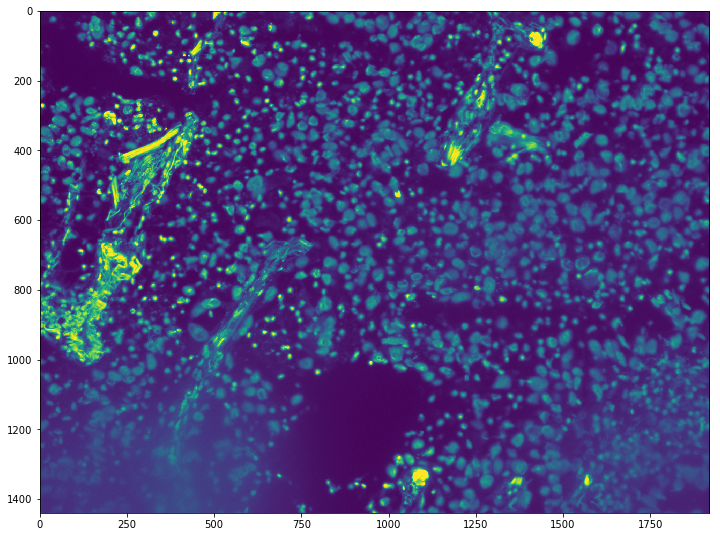

In [5]:
plt.figure(figsize=(12,12))
plt.imshow(d)

In [6]:
# h = np.zeros(d.shape)
# h[60:70,60:70] = 1
# h = h/np.sum(h)
x, y = np.meshgrid(np.linspace(-1,1,d.shape[1]), np.linspace(-1,1,d.shape[0]))
v = np.sqrt(x*x+y*y)
sigma, mu = .05, 0.0
h = np.exp(-( (v-mu)**2 / ( 2.0 * sigma**2 ) ) )
#h = np.where(h > .001, h, 0)

In [7]:
d.shape, h.shape

((1440, 1920), (1440, 1920))

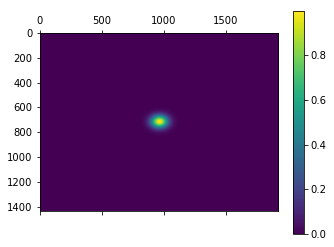

In [8]:
#plt.imshow(h)
cax = plt.matshow(h)
plt.gcf().colorbar(cax)

In [10]:
res = gputools.deconv.deconv_rl(d, h, 10)

In [13]:
res = gputools.deconv.deconv_rl(
    OCLArray.from_array(d.astype(np.float64)),
    OCLArray.from_array(h.astype(np.complex64)),
    10
)
res = res.get()

In [14]:
np.unique(np.isnan(res), return_counts=True)

(array([False], dtype=bool), array([2764800]))

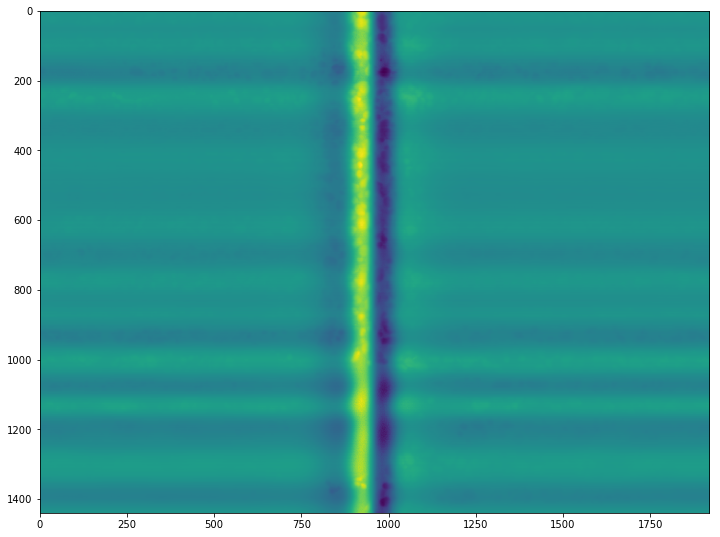

In [16]:
plt.imshow(res.real)
plt.gcf().set_size_inches(12,12)